In [1]:
# Import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # visualization library based on matplotlib
from IPython.display import display # Manage multiple output per cell
import datetime
import sqlite3

In [2]:
# Import sickit methods
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score, roc_auc_score
from sklearn.calibration import calibration_curve

In [3]:
# Import model
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# Configuration
odd_H = 'INFO_BbAvH'
odd_A = 'INFO_BbAvA'
odd_D = 'INFO_BbAvD'
target = 'INFO_FTR'
start_date = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")
min_odd = 2
max_odd = 4

In [5]:
# Define all different features dataset
raw_features = [ "A_MEANS_FIVE_AC","A_MEANS_FIVE_AF","A_MEANS_FIVE_AR","A_MEANS_FIVE_AS","A_MEANS_FIVE_AST","A_MEANS_FIVE_AY","A_MEANS_FIVE_FTAG","A_MEANS_FIVE_FTHG","A_MEANS_FIVE_FTR_A","A_MEANS_FIVE_FTR_D","A_MEANS_FIVE_FTR_H","A_MEANS_FIVE_HC","A_MEANS_FIVE_HF","A_MEANS_FIVE_HR","A_MEANS_FIVE_HS","A_MEANS_FIVE_HST","A_MEANS_FIVE_HTAG","A_MEANS_FIVE_HTHG","A_MEANS_FIVE_HTR_A","A_MEANS_FIVE_HTR_D","A_MEANS_FIVE_HTR_H","A_MEANS_FIVE_HY","H_MEANS_FIVE_AC","H_MEANS_FIVE_AF","H_MEANS_FIVE_AR","H_MEANS_FIVE_AS","H_MEANS_FIVE_AST","H_MEANS_FIVE_AY","H_MEANS_FIVE_FTAG","H_MEANS_FIVE_FTHG","H_MEANS_FIVE_FTR_A","H_MEANS_FIVE_FTR_D","H_MEANS_FIVE_FTR_H","H_MEANS_FIVE_HC","H_MEANS_FIVE_HF","H_MEANS_FIVE_HR","H_MEANS_FIVE_HS","H_MEANS_FIVE_HST","H_MEANS_FIVE_HTAG","H_MEANS_FIVE_HTHG","H_MEANS_FIVE_HTR_A","H_MEANS_FIVE_HTR_D","H_MEANS_FIVE_HTR_H","H_MEANS_FIVE_HY","A_MEANS_THREE_AC","A_MEANS_THREE_AF","A_MEANS_THREE_AR","A_MEANS_THREE_AS","A_MEANS_THREE_AST","A_MEANS_THREE_AY","A_MEANS_THREE_FTAG","A_MEANS_THREE_FTHG","A_MEANS_THREE_FTR_A","A_MEANS_THREE_FTR_D","A_MEANS_THREE_FTR_H","A_MEANS_THREE_HC","A_MEANS_THREE_HF","A_MEANS_THREE_HR","A_MEANS_THREE_HS","A_MEANS_THREE_HST","A_MEANS_THREE_HTAG","A_MEANS_THREE_HTHG","A_MEANS_THREE_HTR_A","A_MEANS_THREE_HTR_D","A_MEANS_THREE_HTR_H","A_MEANS_THREE_HY","H_MEANS_THREE_AC","H_MEANS_THREE_AF","H_MEANS_THREE_AR","H_MEANS_THREE_AS","H_MEANS_THREE_AST","H_MEANS_THREE_AY","H_MEANS_THREE_FTAG","H_MEANS_THREE_FTHG","H_MEANS_THREE_FTR_A","H_MEANS_THREE_FTR_D","H_MEANS_THREE_FTR_H","H_MEANS_THREE_HC","H_MEANS_THREE_HF","H_MEANS_THREE_HR","H_MEANS_THREE_HS","H_MEANS_THREE_HST","H_MEANS_THREE_HTAG","H_MEANS_THREE_HTHG","H_MEANS_THREE_HTR_A","H_MEANS_THREE_HTR_D","H_MEANS_THREE_HTR_H","H_MEANS_THREE_HY","A_STD_FIVE_AC","A_STD_FIVE_AF","A_STD_FIVE_AR","A_STD_FIVE_AS","A_STD_FIVE_AST","A_STD_FIVE_AY","A_STD_FIVE_FTAG","A_STD_FIVE_FTHG","A_STD_FIVE_FTR_A","A_STD_FIVE_FTR_D","A_STD_FIVE_FTR_H","A_STD_FIVE_HC","A_STD_FIVE_HF","A_STD_FIVE_HR","A_STD_FIVE_HS","A_STD_FIVE_HST","A_STD_FIVE_HTAG","A_STD_FIVE_HTHG","A_STD_FIVE_HTR_A","A_STD_FIVE_HTR_D","A_STD_FIVE_HTR_H","A_STD_FIVE_HY","H_STD_FIVE_AC","H_STD_FIVE_AF","H_STD_FIVE_AR","H_STD_FIVE_AS","H_STD_FIVE_AST","H_STD_FIVE_AY","H_STD_FIVE_FTAG","H_STD_FIVE_FTHG","H_STD_FIVE_FTR_A","H_STD_FIVE_FTR_D","H_STD_FIVE_FTR_H","H_STD_FIVE_HC","H_STD_FIVE_HF","H_STD_FIVE_HR","H_STD_FIVE_HS","H_STD_FIVE_HST","H_STD_FIVE_HTAG","H_STD_FIVE_HTHG","H_STD_FIVE_HTR_A","H_STD_FIVE_HTR_D","H_STD_FIVE_HTR_H","H_STD_FIVE_HY","A_STD_THREE_AC","A_STD_THREE_AF","A_STD_THREE_AR","A_STD_THREE_AS","A_STD_THREE_AST","A_STD_THREE_AY","A_STD_THREE_FTAG","A_STD_THREE_FTHG","A_STD_THREE_FTR_A","A_STD_THREE_FTR_D","A_STD_THREE_FTR_H","A_STD_THREE_HC","A_STD_THREE_HF","A_STD_THREE_HR","A_STD_THREE_HS","A_STD_THREE_HST","A_STD_THREE_HTAG","A_STD_THREE_HTHG","A_STD_THREE_HTR_A","A_STD_THREE_HTR_D","A_STD_THREE_HTR_H","A_STD_THREE_HY","H_STD_THREE_AC","H_STD_THREE_AF","H_STD_THREE_AR","H_STD_THREE_AS","H_STD_THREE_AST","H_STD_THREE_AY","H_STD_THREE_FTAG","H_STD_THREE_FTHG","H_STD_THREE_FTR_A","H_STD_THREE_FTR_D","H_STD_THREE_FTR_H","H_STD_THREE_HC","H_STD_THREE_HF","H_STD_THREE_HR","H_STD_THREE_HS","H_STD_THREE_HST","H_STD_THREE_HTAG","H_STD_THREE_HTHG","H_STD_THREE_HTR_A","H_STD_THREE_HTR_D","H_STD_THREE_HTR_H","H_STD_THREE_HY","INFO_Div"]
all_features = ['A_MEANS_FIVE_AC','A_MEANS_FIVE_AF','A_MEANS_FIVE_AR','A_MEANS_FIVE_AS','A_MEANS_FIVE_AST','A_MEANS_FIVE_AY','A_MEANS_FIVE_FTAG','A_MEANS_FIVE_FTHG','A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_D','A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC','A_MEANS_FIVE_HF','A_MEANS_FIVE_HR','A_MEANS_FIVE_HS','A_MEANS_FIVE_HST','A_MEANS_FIVE_HTAG','A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A','A_MEANS_FIVE_HTR_D','A_MEANS_FIVE_HTR_H','A_MEANS_FIVE_HY','H_MEANS_FIVE_AC','H_MEANS_FIVE_AF','H_MEANS_FIVE_AR','H_MEANS_FIVE_AS','H_MEANS_FIVE_AST','H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_D','H_MEANS_FIVE_FTR_H','H_MEANS_FIVE_HC','H_MEANS_FIVE_HF','H_MEANS_FIVE_HR','H_MEANS_FIVE_HS','H_MEANS_FIVE_HST','H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTHG','H_MEANS_FIVE_HTR_A','H_MEANS_FIVE_HTR_D','H_MEANS_FIVE_HTR_H','H_MEANS_FIVE_HY','A_MEANS_THREE_AC','A_MEANS_THREE_AF','A_MEANS_THREE_AR','A_MEANS_THREE_AS','A_MEANS_THREE_AST','A_MEANS_THREE_AY','A_MEANS_THREE_FTAG','A_MEANS_THREE_FTHG','A_MEANS_THREE_FTR_A','A_MEANS_THREE_FTR_D','A_MEANS_THREE_FTR_H','A_MEANS_THREE_HC','A_MEANS_THREE_HF','A_MEANS_THREE_HR','A_MEANS_THREE_HS','A_MEANS_THREE_HST','A_MEANS_THREE_HTAG','A_MEANS_THREE_HTHG','A_MEANS_THREE_HTR_A','A_MEANS_THREE_HTR_D','A_MEANS_THREE_HTR_H','A_MEANS_THREE_HY','H_MEANS_THREE_AC','H_MEANS_THREE_AF','H_MEANS_THREE_AR','H_MEANS_THREE_AS','H_MEANS_THREE_AST','H_MEANS_THREE_AY','H_MEANS_THREE_FTAG','H_MEANS_THREE_FTHG','H_MEANS_THREE_FTR_A','H_MEANS_THREE_FTR_D','H_MEANS_THREE_FTR_H','H_MEANS_THREE_HC','H_MEANS_THREE_HF','H_MEANS_THREE_HR','H_MEANS_THREE_HS','H_MEANS_THREE_HST','H_MEANS_THREE_HTAG','H_MEANS_THREE_HTHG','H_MEANS_THREE_HTR_A','H_MEANS_THREE_HTR_D','H_MEANS_THREE_HTR_H','H_MEANS_THREE_HY','A_STD_FIVE_AC','A_STD_FIVE_AF','A_STD_FIVE_AR','A_STD_FIVE_AS','A_STD_FIVE_AST','A_STD_FIVE_AY','A_STD_FIVE_FTAG','A_STD_FIVE_FTHG','A_STD_FIVE_FTR_A','A_STD_FIVE_FTR_D','A_STD_FIVE_FTR_H','A_STD_FIVE_HC','A_STD_FIVE_HF','A_STD_FIVE_HR','A_STD_FIVE_HS','A_STD_FIVE_HST','A_STD_FIVE_HTAG','A_STD_FIVE_HTHG','A_STD_FIVE_HTR_A','A_STD_FIVE_HTR_D','A_STD_FIVE_HTR_H','A_STD_FIVE_HY','H_STD_FIVE_AC','H_STD_FIVE_AF','H_STD_FIVE_AR','H_STD_FIVE_AS','H_STD_FIVE_AST','H_STD_FIVE_AY','H_STD_FIVE_FTAG','H_STD_FIVE_FTHG','H_STD_FIVE_FTR_A','H_STD_FIVE_FTR_D','H_STD_FIVE_FTR_H','H_STD_FIVE_HC','H_STD_FIVE_HF','H_STD_FIVE_HR','H_STD_FIVE_HS','H_STD_FIVE_HST','H_STD_FIVE_HTAG','H_STD_FIVE_HTHG','H_STD_FIVE_HTR_A','H_STD_FIVE_HTR_D','H_STD_FIVE_HTR_H','H_STD_FIVE_HY','A_STD_THREE_AC','A_STD_THREE_AF','A_STD_THREE_AR','A_STD_THREE_AS','A_STD_THREE_AST','A_STD_THREE_AY','A_STD_THREE_FTAG','A_STD_THREE_FTHG','A_STD_THREE_FTR_A','A_STD_THREE_FTR_D','A_STD_THREE_FTR_H','A_STD_THREE_HC','A_STD_THREE_HF','A_STD_THREE_HR','A_STD_THREE_HS','A_STD_THREE_HST','A_STD_THREE_HTAG','A_STD_THREE_HTHG','A_STD_THREE_HTR_A','A_STD_THREE_HTR_D','A_STD_THREE_HTR_H','A_STD_THREE_HY','H_STD_THREE_AC','H_STD_THREE_AF','H_STD_THREE_AR','H_STD_THREE_AS','H_STD_THREE_AST','H_STD_THREE_AY','H_STD_THREE_FTAG','H_STD_THREE_FTHG','H_STD_THREE_FTR_A','H_STD_THREE_FTR_D','H_STD_THREE_FTR_H','H_STD_THREE_HC','H_STD_THREE_HF','H_STD_THREE_HR','H_STD_THREE_HS','H_STD_THREE_HST','H_STD_THREE_HTAG','H_STD_THREE_HTHG','H_STD_THREE_HTR_A','H_STD_THREE_HTR_D','H_STD_THREE_HTR_H','H_STD_THREE_HY','INFO_Div_D1','INFO_Div_E0','INFO_Div_E1','INFO_Div_E2','INFO_Div_F1','INFO_Div_I1','INFO_Div_SC0','INFO_Div_SP1']
all_features_no_div = ['A_MEANS_FIVE_AC','A_MEANS_FIVE_AF','A_MEANS_FIVE_AR','A_MEANS_FIVE_AS','A_MEANS_FIVE_AST','A_MEANS_FIVE_AY','A_MEANS_FIVE_FTAG','A_MEANS_FIVE_FTHG','A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_D','A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC','A_MEANS_FIVE_HF','A_MEANS_FIVE_HR','A_MEANS_FIVE_HS','A_MEANS_FIVE_HST','A_MEANS_FIVE_HTAG','A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A','A_MEANS_FIVE_HTR_D','A_MEANS_FIVE_HTR_H','A_MEANS_FIVE_HY','H_MEANS_FIVE_AC','H_MEANS_FIVE_AF','H_MEANS_FIVE_AR','H_MEANS_FIVE_AS','H_MEANS_FIVE_AST','H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_D','H_MEANS_FIVE_FTR_H','H_MEANS_FIVE_HC','H_MEANS_FIVE_HF','H_MEANS_FIVE_HR','H_MEANS_FIVE_HS','H_MEANS_FIVE_HST','H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTHG','H_MEANS_FIVE_HTR_A','H_MEANS_FIVE_HTR_D','H_MEANS_FIVE_HTR_H','H_MEANS_FIVE_HY','A_MEANS_THREE_AC','A_MEANS_THREE_AF','A_MEANS_THREE_AR','A_MEANS_THREE_AS','A_MEANS_THREE_AST','A_MEANS_THREE_AY','A_MEANS_THREE_FTAG','A_MEANS_THREE_FTHG','A_MEANS_THREE_FTR_A','A_MEANS_THREE_FTR_D','A_MEANS_THREE_FTR_H','A_MEANS_THREE_HC','A_MEANS_THREE_HF','A_MEANS_THREE_HR','A_MEANS_THREE_HS','A_MEANS_THREE_HST','A_MEANS_THREE_HTAG','A_MEANS_THREE_HTHG','A_MEANS_THREE_HTR_A','A_MEANS_THREE_HTR_D','A_MEANS_THREE_HTR_H','A_MEANS_THREE_HY','H_MEANS_THREE_AC','H_MEANS_THREE_AF','H_MEANS_THREE_AR','H_MEANS_THREE_AS','H_MEANS_THREE_AST','H_MEANS_THREE_AY','H_MEANS_THREE_FTAG','H_MEANS_THREE_FTHG','H_MEANS_THREE_FTR_A','H_MEANS_THREE_FTR_D','H_MEANS_THREE_FTR_H','H_MEANS_THREE_HC','H_MEANS_THREE_HF','H_MEANS_THREE_HR','H_MEANS_THREE_HS','H_MEANS_THREE_HST','H_MEANS_THREE_HTAG','H_MEANS_THREE_HTHG','H_MEANS_THREE_HTR_A','H_MEANS_THREE_HTR_D','H_MEANS_THREE_HTR_H','H_MEANS_THREE_HY','A_STD_FIVE_AC','A_STD_FIVE_AF','A_STD_FIVE_AR','A_STD_FIVE_AS','A_STD_FIVE_AST','A_STD_FIVE_AY','A_STD_FIVE_FTAG','A_STD_FIVE_FTHG','A_STD_FIVE_FTR_A','A_STD_FIVE_FTR_D','A_STD_FIVE_FTR_H','A_STD_FIVE_HC','A_STD_FIVE_HF','A_STD_FIVE_HR','A_STD_FIVE_HS','A_STD_FIVE_HST','A_STD_FIVE_HTAG','A_STD_FIVE_HTHG','A_STD_FIVE_HTR_A','A_STD_FIVE_HTR_D','A_STD_FIVE_HTR_H','A_STD_FIVE_HY','H_STD_FIVE_AC','H_STD_FIVE_AF','H_STD_FIVE_AR','H_STD_FIVE_AS','H_STD_FIVE_AST','H_STD_FIVE_AY','H_STD_FIVE_FTAG','H_STD_FIVE_FTHG','H_STD_FIVE_FTR_A','H_STD_FIVE_FTR_D','H_STD_FIVE_FTR_H','H_STD_FIVE_HC','H_STD_FIVE_HF','H_STD_FIVE_HR','H_STD_FIVE_HS','H_STD_FIVE_HST','H_STD_FIVE_HTAG','H_STD_FIVE_HTHG','H_STD_FIVE_HTR_A','H_STD_FIVE_HTR_D','H_STD_FIVE_HTR_H','H_STD_FIVE_HY','A_STD_THREE_AC','A_STD_THREE_AF','A_STD_THREE_AR','A_STD_THREE_AS','A_STD_THREE_AST','A_STD_THREE_AY','A_STD_THREE_FTAG','A_STD_THREE_FTHG','A_STD_THREE_FTR_A','A_STD_THREE_FTR_D','A_STD_THREE_FTR_H','A_STD_THREE_HC','A_STD_THREE_HF','A_STD_THREE_HR','A_STD_THREE_HS','A_STD_THREE_HST','A_STD_THREE_HTAG','A_STD_THREE_HTHG','A_STD_THREE_HTR_A','A_STD_THREE_HTR_D','A_STD_THREE_HTR_H','A_STD_THREE_HY','H_STD_THREE_AC','H_STD_THREE_AF','H_STD_THREE_AR','H_STD_THREE_AS','H_STD_THREE_AST','H_STD_THREE_AY','H_STD_THREE_FTAG','H_STD_THREE_FTHG','H_STD_THREE_FTR_A','H_STD_THREE_FTR_D','H_STD_THREE_FTR_H','H_STD_THREE_HC','H_STD_THREE_HF','H_STD_THREE_HR','H_STD_THREE_HS','H_STD_THREE_HST','H_STD_THREE_HTAG','H_STD_THREE_HTHG','H_STD_THREE_HTR_A','H_STD_THREE_HTR_D','H_STD_THREE_HTR_H','H_STD_THREE_HY']
best_features_DNN_adam_38 = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF', 'A_MEANS_FIVE_HS','A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTR_H','A_MEANS_THREE_AC', 'A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG','A_MEANS_THREE_HF', 'A_MEANS_THREE_HS', 'H_MEANS_THREE_AS','H_MEANS_THREE_HC', 'A_STD_FIVE_AST', 'A_STD_FIVE_HF','H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_HC', 'H_STD_FIVE_HF','H_STD_FIVE_HST']
best_features_DNN_SGD_56 = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HF','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_FTR_A', 'A_MEANS_THREE_HC','A_MEANS_THREE_HF', 'A_MEANS_THREE_HS', 'A_MEANS_THREE_HST','H_MEANS_THREE_AC', 'H_MEANS_THREE_AS', 'H_MEANS_THREE_FTHG','H_MEANS_THREE_HC', 'H_MEANS_THREE_HST', 'H_MEANS_THREE_HTR_H','A_STD_FIVE_AF', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF','A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST','H_STD_FIVE_HC', 'H_STD_FIVE_HF', 'H_STD_FIVE_HST','H_STD_FIVE_HTHG', 'H_STD_THREE_AS', 'H_STD_THREE_HST']
best_features_XGBoost_60 = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_AY', 'A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG','A_MEANS_FIVE_FTR_A', 'A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC','A_MEANS_FIVE_HF', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTHG', 'A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC','H_MEANS_FIVE_HF', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTAG', 'H_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_HTR_H','A_MEANS_THREE_AC', 'A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG','A_MEANS_THREE_FTR_A', 'A_MEANS_THREE_HC', 'A_MEANS_THREE_HF','A_MEANS_THREE_HS', 'A_MEANS_THREE_HST', 'H_MEANS_THREE_AC','H_MEANS_THREE_AS', 'H_MEANS_THREE_AST', 'H_MEANS_THREE_FTHG','H_MEANS_THREE_HC', 'H_MEANS_THREE_HST', 'H_MEANS_THREE_HTR_H','A_STD_FIVE_AF', 'A_STD_FIVE_AS', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC','A_STD_FIVE_HF', 'A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS','H_STD_FIVE_AST', 'H_STD_FIVE_HC', 'H_STD_FIVE_HF','H_STD_FIVE_HST', 'H_STD_FIVE_HTHG', 'H_STD_THREE_AS','H_STD_THREE_HST']
best_features_SVM = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS','H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HS', 'H_MEANS_THREE_AS','A_STD_FIVE_HF', 'H_STD_FIVE_HC', 'H_STD_FIVE_HST']
best_features_RF = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HF','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HC', 'A_MEANS_THREE_HF','A_MEANS_THREE_HS', 'H_MEANS_THREE_AC', 'H_MEANS_THREE_AS','H_MEANS_THREE_FTHG', 'H_MEANS_THREE_HC', 'H_MEANS_THREE_HST','A_STD_FIVE_AF', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF','A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST','H_STD_FIVE_HC', 'H_STD_FIVE_HF', 'H_STD_FIVE_HST','H_STD_FIVE_HTHG', 'H_STD_THREE_AS', 'H_STD_THREE_HST']
best_features_NB = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS','H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HS', 'H_MEANS_THREE_AS','A_STD_FIVE_HF', 'H_STD_FIVE_HC', 'H_STD_FIVE_HST']
best_features_MLP = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS','H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HS', 'H_MEANS_THREE_AS','A_STD_FIVE_HF', 'H_STD_FIVE_HC', 'H_STD_FIVE_HST']
best_features_LDA = ['A_MEANS_FIVE_AS', 'A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_HC','A_MEANS_FIVE_HS', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS','H_MEANS_FIVE_HST']
best_features_KNN = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS','A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','A_MEANS_THREE_AS', 'A_MEANS_THREE_HS', 'A_STD_FIVE_HF']
best_features_ExraTree = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HF','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_FTR_A', 'A_MEANS_THREE_HC','A_MEANS_THREE_HF', 'A_MEANS_THREE_HS', 'A_MEANS_THREE_HST','H_MEANS_THREE_AC', 'H_MEANS_THREE_AS', 'H_MEANS_THREE_FTHG','H_MEANS_THREE_HC', 'H_MEANS_THREE_HST', 'H_MEANS_THREE_HTR_H','A_STD_FIVE_AF', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF','A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST','H_STD_FIVE_HC', 'H_STD_FIVE_HF', 'H_STD_FIVE_HST','H_STD_FIVE_HTHG', 'H_STD_THREE_AS', 'H_STD_THREE_HST']
best_features_ElasticNEt = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTR_A','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS','H_MEANS_FIVE_HST', 'A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG','A_MEANS_THREE_HS', 'A_STD_FIVE_HF', 'H_STD_FIVE_HST']
best_features_bagging = ['A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST', 'A_MEANS_FIVE_FTAG','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','A_MEANS_THREE_HS']
best_features_AdaBoost = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS','H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC','A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HS','H_MEANS_THREE_AS', 'H_MEANS_THREE_HC', 'A_STD_FIVE_AST','A_STD_FIVE_HF', 'H_STD_FIVE_AF', 'H_STD_FIVE_HC','H_STD_FIVE_HST']
best_features_LR = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF', 'A_MEANS_FIVE_HS','A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC','H_MEANS_FIVE_HF', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTAG', 'H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC','A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HF','A_MEANS_THREE_HS', 'H_MEANS_THREE_AS', 'H_MEANS_THREE_HC','A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF', 'A_STD_FIVE_HS','H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST', 'H_STD_FIVE_HC','H_STD_FIVE_HF', 'H_STD_FIVE_HST']
best_features_GB = ['A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HF','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HC', 'A_MEANS_THREE_HF','A_MEANS_THREE_HS', 'H_MEANS_THREE_AC', 'H_MEANS_THREE_AS','H_MEANS_THREE_FTHG', 'H_MEANS_THREE_HC', 'H_MEANS_THREE_HST','A_STD_FIVE_AF', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF','A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST','H_STD_FIVE_HC', 'H_STD_FIVE_HF', 'H_STD_FIVE_HST','H_STD_FIVE_HTHG', 'H_STD_THREE_AS', 'H_STD_THREE_HST']

In [6]:
# Construct layer 1
# [Model_name, Preprocessing_needed, calibration, model_with_hyperparameter, feature_list]
layer_1 = [
    ['XGBoost_bf', False, 'no', XGBClassifier(learning_rate =0.01,n_estimators=207,max_depth=3,min_child_weight=3,gamma=0.4,subsample=0.65,colsample_bytree=0.85,objective= 'multi:softprob',nthread=4,scale_pos_weight=1,seed=15), all_features_no_div],
    ['RF_bf', False, 'no', RandomForestClassifier(random_state=0, n_jobs=-1,criterion='entropy', max_depth=5, max_features='sqrt', min_samples_leaf=4, min_samples_split=23, n_estimators=620), best_features_RF],
    ['NB', True, 'no', GaussianNB(), best_features_NB],
    ['MLP', True, 'no', MLPClassifier(random_state=0,activation='logistic', alpha=1, hidden_layer_sizes=(100,), max_iter=200, solver= 'sgd'), best_features_MLP],
    ['KNN', True, 'no', KNeighborsClassifier(n_jobs=-1,n_neighbors=650, p=2, weights='uniform'), best_features_KNN],
]

In [7]:
# Import and Prepare dataset
# DB Sqlite connection
db = "/Users/thibaultclement/Project/ligue1-predict/src/notebook/data/db/soccer_predict.sqlite"
conn = sqlite3.connect(db)
cur = conn.cursor()
# Get all prematch data
df = pd.read_sql_query("SELECT * FROM pre_matchs ORDER BY INFO_Date ASC;", conn)
df = (df[df.columns.drop(['index'])])
# Create a INFO_WIN column containing the gain if you bet the good result
df['INFO_WIN'] = 0
df.loc[df.INFO_FTR == 'H', 'INFO_WIN'] = df[odd_H]
df.loc[df.INFO_FTR == 'A', 'INFO_WIN'] = df[odd_A]
df.loc[df.INFO_FTR == 'D', 'INFO_WIN'] = df[odd_D]
df['INFO_WIN_P'] = 0
df.loc[df.INFO_FTR == 'H', 'INFO_WIN_P'] = df['INFO_PSH']
df.loc[df.INFO_FTR == 'A', 'INFO_WIN_P'] = df['INFO_PSA']
df.loc[df.INFO_FTR == 'D', 'INFO_WIN_P'] = df['INFO_PSD']
df[[odd_H, odd_D, odd_A, 'INFO_FTR', 'INFO_WIN']].head(10)
# Remove all game between June (include) and October (include)
df['INFO_Date'] = pd.to_datetime(df['INFO_Date'])
df['INFO_Date'].dt.month
df = df[(df['INFO_Date'].dt.month < 6) | (df['INFO_Date'].dt.month > 10)]
# Select a particular league
df = df[(df['INFO_Div'] == 'E0')]
# Shuffle dataset
df_all = pd.get_dummies(df.sample(frac=1))
# Keep season 2016/2017 for further test and don't use it for traning
import datetime
date_start_learn = datetime.date(2007, 8, 1)
date_end_learn = datetime.date(2016, 8, 1)
date_start_current_season = datetime.date(2016, 8, 1)
date_end_current_season = datetime.date(2017, 8, 1)
df_current_season = df[(df['INFO_Date'] > date_start_current_season)]
test_df = df_current_season[(df_current_season['INFO_Date'] < date_end_current_season)]
df = df[(df['INFO_Date'] > date_start_learn)]
train_df = df[(df['INFO_Date'] < date_end_learn)]
train_df = train_df.reset_index()
test_df = test_df.reset_index()
# Remove too small and too high odd for training dataset
#train_df_range = train_df[(train_df[odd_H] > min_odd) & (train_df[odd_A] > min_odd)]
#train_df_range = train_df[(train_df[odd_H] < max_odd) & (train_df[odd_A] < max_odd)]
# Encode string label
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df[target])
# Create X and y for train and test set
X_train_df = pd.get_dummies(train_df[raw_features])
#X_train_df_range = pd.get_dummies(train_df_range[raw_features])
X_test_df = pd.get_dummies(test_df[raw_features])
y_train_df = le.transform(train_df[target])
#y_train_df_range = le.transform(train_df_range[target])
y_test_df= le.transform(test_df[target])
# Impute of missing values (NaN) with the mean
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(X_train_df)
X_imputed = imp.transform(X_train_df)
X_train_df = pd.DataFrame(X_imputed, columns = X_train_df.columns)
#X_imputed = imp.transform(X_train_df_range)
#X_train_df_range = pd.DataFrame(X_imputed, columns = X_train_df_range.columns)
X_imputed = imp.transform(X_test_df)
X_test_df = pd.DataFrame(X_imputed, columns = X_test_df.columns)

In [8]:
from sklearn.cross_validation import KFold
ntrain = X_train_df.shape[0]
#ntrain_range = X_train_df_range.shape[0]
ntest = X_test_df.shape[0]
NFOLDS = 4
kf = KFold(ntrain, n_folds=NFOLDS, shuffle=True, random_state=0)
#kf_range = KFold(ntrain_range, n_folds=NFOLDS, shuffle=True, random_state=0)

In [9]:
def get_oof(clf, x_train, x_test, kf_param):
    oof_train = np.zeros((x_train.shape[0],3))
    oof_test = np.zeros((x_test.shape[0],3))
    oof_test_skf = np.empty((NFOLDS, x_test.shape[0], 3))

    for i, (train_index, test_index) in enumerate(kf_param):
        x_tr = x_train[train_index]
        y_tr = y_train_df[train_index]
        x_te = x_train[test_index]
        # Calibrate model
        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict_proba(x_te)
        oof_test_skf[i, :] = clf.predict_proba(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train, oof_test

In [10]:
# Compute out-of-fold predictions for layer 1 
start = datetime.datetime.now()

# Create column name of df
cols = []
for clf_name, preprocessing, calibration, clf, features in layer_1:
    for result in le.classes_:
        cols.append(clf_name+result)

# Keep prediction of test in array
X_train_layer2 = np.zeros((X_train_df.shape[0], len(layer_1)*3))
X_train_layer2 = pd.DataFrame(X_train_layer2, columns=cols)

X_test_layer2 = np.zeros((X_test_df.shape[0], len(layer_1)*3))
X_test_layer2 = pd.DataFrame(X_test_layer2, columns=cols)

for clf_name, preprocessing, calibration, classifier, features in layer_1:
    print "Processing model:",clf_name
    # Check if we need to standardize X for this model
    if preprocessing:
        sc_X = StandardScaler().fit(X_train_df[features])
        X_train_model = sc_X.transform(X_train_df[features])
        X_test_model = sc_X.transform(X_test_df[features])
    else:
        X_train_model = X_train_df[features].as_matrix()
        X_test_model = X_test_df[features].as_matrix()
    # Check if we need to recalibrate the prediction
    if calibration == 'sigmoid':
        clf = CalibratedClassifierCV(classifier, cv=4, method='sigmoid')
    elif calibration == 'isotonic':
        clf = CalibratedClassifierCV(classifier, cv=4, method='isotonic')
    elif calibration == 'no':
        clf = classifier
    # obtain out-of-fold predictions for this model
    oof_train, oof_test = get_oof(clf, X_train_model, X_test_model, kf)
    X_train_layer2.loc[:, [clf_name+result for result in le.classes_]] = oof_train
    X_test_layer2.loc[:, [clf_name+result for result in le.classes_]] = oof_test
X_train_layer2.to_csv('./report/'+start.strftime("%Y-%m-%d-%H-%M")+'-layer1-train-pred.csv')
X_test_layer2.to_csv('./report/'+start.strftime("%Y-%m-%d-%H-%M")+'-layer1-test-pred.csv')

print("Finish after %d seconds" % (datetime.datetime.now() - start).total_seconds())


Processing model: XGBoost_bf
Processing model: RF_bf
Processing model: NB
Processing model: MLP
Processing model: KNN
Finish after 40 seconds


In [11]:
# Concat prediction with initial features
X_train_layer2_df = pd.concat([train_df, X_train_layer2, pd.DataFrame(y_train_df)], axis=1)
X_test_layer2_df = pd.concat([test_df, X_test_layer2, pd.DataFrame(y_test_df)], axis=1)
X_train_layer2_df.to_csv('./report/layer2-train-'+target+'-'+start.strftime("%Y-%m-%d-%H-%M")+'.csv')
X_test_layer2_df.to_csv('./report/layer2-test-'+target+'-'+start.strftime("%Y-%m-%d-%H-%M")+'.csv')

In [12]:
y_train_df

array([1, 2, 1, ..., 1, 1, 2])

In [13]:
X_layer2_train = X_train_layer2
X_layer2_test = X_test_layer2

#X_layer2_train = pd.concat([X_train_df, X_train_layer2], axis=1)
#X_layer2_test = pd.concat([X_test_df, X_test_layer2], axis=1)

#X_layer2_train = pd.concat([X_train_df[best_features_LR], X_train_layer2], axis=1)
#X_layer2_test = pd.concat([X_test_df[best_features_LR], X_test_layer2], axis=1)

#X_layer2_train = pd.concat([X_train_df[['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD']], X_train_layer2], axis=1)
#X_layer2_test = pd.concat([X_test_df[['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD']], X_test_layer2], axis=1)

#X_layer2_train = X_train_df[['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD']]
#X_layer2_test = X_test_df[['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD']]

In [14]:
#clf2 = XGBClassifier()
#clf2 = XGBClassifier(learning_rate =0.01,n_estimators=572,max_depth=3,min_child_weight=5,gamma=0,subsample=0.9,colsample_bytree=0.9,objective= 'multi:softprob',nthread=4,scale_pos_weight=1,seed=15) 
#clf2 = XGBClassifier(learning_rate =0.01,n_estimators=207,max_depth=3,min_child_weight=3,gamma=0.4,subsample=0.65,colsample_bytree=0.85,objective= 'multi:softprob',nthread=4,scale_pos_weight=1,seed=15)
#clf2 = ExtraTreesClassifier(random_state=0,n_jobs=-1,criterion='entropy',max_depth=30,max_features=None,min_samples_leaf=1,min_samples_split=16,n_estimators=350)
#clf2 = MLPClassifier(random_state=0,activation='logistic', alpha=1, hidden_layer_sizes=(100,), max_iter=500, solver= 'sgd')
#clf2 = GaussianNB()
clf2 = LogisticRegression()
clf2.fit(X_layer2_train, y_train_df)
layer2_pred = clf2.predict(X_layer2_test)
layer2_pred_probs = clf2.predict_proba(X_layer2_test)

In [15]:
# Add all betting information back to the predic dataset
X_test_layer2_df['pred'] = le.inverse_transform(layer2_pred)

X_test_layer2_df['probs_A'] = layer2_pred_probs[:,0]
X_test_layer2_df['probs_D'] = layer2_pred_probs[:,1]
X_test_layer2_df['probs_H'] = layer2_pred_probs[:,2]
X_test_layer2_df['probs'] = X_test_layer2_df[['probs_A','probs_D','probs_H']].max(axis=1)

X_test_layer2_df['GOOD'] = False
X_test_layer2_df.loc[X_test_layer2_df.INFO_FTR == X_test_layer2_df.pred, 'GOOD'] = True

X_test_layer2_df['WIN'] = -1
X_test_layer2_df.loc[X_test_layer2_df.INFO_FTR == X_test_layer2_df.pred, 'WIN'] = X_test_layer2_df['INFO_WIN']-1

X_test_layer2_df['WIN_D'] = -1
X_test_layer2_df.loc[X_test_layer2_df.INFO_FTR == 'D', 'WIN_D'] = X_test_layer2_df['INFO_BbAvD']-1

X_test_layer2_df['WIN_P'] = -1
X_test_layer2_df.loc[X_test_layer2_df.INFO_FTR == X_test_layer2_df.pred, 'WIN_P'] = X_test_layer2_df['INFO_WIN_P']-1

X_test_layer2_df['INFO_ODD_BET'] = 0
X_test_layer2_df.loc[X_test_layer2_df.pred == 'A', 'INFO_ODD_BET'] = X_test_layer2_df[odd_A]
X_test_layer2_df.loc[X_test_layer2_df.pred == 'D', 'INFO_ODD_BET'] = X_test_layer2_df[odd_D]
X_test_layer2_df.loc[X_test_layer2_df.pred == 'H', 'INFO_ODD_BET'] = X_test_layer2_df[odd_H]

X_test_layer2_df['prob_less_bet'] = 0
X_test_layer2_df.loc[X_test_layer2_df.pred == 'A', 'prob_less_bet'] = X_test_layer2_df['probs'] - X_test_layer2_df[odd_A].apply(lambda x: 1/x)
X_test_layer2_df.loc[X_test_layer2_df.pred == 'D', 'prob_less_bet'] = X_test_layer2_df['probs'] - X_test_layer2_df[odd_D].apply(lambda x: 1/x)
X_test_layer2_df.loc[X_test_layer2_df.pred == 'H', 'prob_less_bet'] = X_test_layer2_df['probs'] - X_test_layer2_df[odd_H].apply(lambda x: 1/x)

In [16]:
# Compute cross-entropy score
from sklearn.metrics import log_loss
log_loss(y_test_df, layer2_pred_probs)

0.93204634806710618

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_df, layer2_pred)

0.57857142857142863

In [18]:
# Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test_df, layer2_pred, target_names=['A', 'D', 'H']))

             precision    recall  f1-score   support

          A       0.47      0.58      0.52        77
          D       0.00      0.00      0.00        58
          H       0.63      0.81      0.71       145

avg / total       0.46      0.58      0.51       280



/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
# Remove games I didn't bet on
df_bet_test_season = X_test_layer2_df
#df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[df_bet_test_season.probs <= 0.5].index)

#df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[df_bet_test_season.pred != 'H'].index)
#df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[df_bet_test_season.pred == 'D'].index)

#df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[df_bet_test_season.probs_D < 0.35].index)

#df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[df_bet_test_season.prob_less_bet <= -0.1].index)
#df_bet_test_season = df_bet_test_season[df_bet_test_season.prob_less_bet > -0.2]

#df_bet_test_season = df_bet_test_season[df_bet_test_season['INFO_ODD_BET'] > 2]
#df_bet_test_season = df_bet_test_season[df_bet_test_season['INFO_ODD_BET'] < 1.9]

df_bet_test_season = df_bet_test_season[df_bet_test_season['INFO_Div'] == 'E0']

#df_bet_test_season = df_bet_test_season[(df_bet_test_season['INFO_Date'].dt.year < 2018) & (df_bet_test_season['INFO_Date'].dt.year > 2013)]

#df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[(df_bet_test_season.A_MEANS_FIVE_FTHG - df_bet_test_season.A_MEANS_FIVE_FTAG) > 0.8].index)
#df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[(df_bet_test_season.A_MEANS_FIVE_FTAG - df_bet_test_season.A_MEANS_FIVE_FTHG) > 0.8].index)
#df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[df_bet_test_season.A_MEANS_FIVE_FTHG > 3].index)
#df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[df_bet_test_season.A_MEANS_FIVE_FTAG < 1].index)
#df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[df_bet_test_season.A_MEANS_FIVE_FTAG > 3].index)

In [20]:
df_bet_test_season.probs_D.mean()

0.2544853667180612

In [21]:
# Number of games in the test set
df_bet_test_season.shape

(280, 220)

In [22]:
# What will be the real result of games I bet on
display(plt.show(), 100. * df_bet_test_season.INFO_FTR.value_counts() / len(df_bet_test_season.INFO_FTR))

None

H    51.785714
A    27.500000
D    20.714286
Name: INFO_FTR, dtype: float64

In [23]:
# What will I bet on
display(plt.show(), 100. * df_bet_test_season.pred.value_counts() / len(df_bet_test_season.pred))

None

H    66.071429
A    33.928571
Name: pred, dtype: float64

In [24]:
# How good I will be
display(plt.show(), 100. * df_bet_test_season.GOOD.value_counts() / len(df_bet_test_season.GOOD))

None

True     57.857143
False    42.142857
Name: GOOD, dtype: float64

In [25]:
df_bet_test_season.probs.mean()

0.5231328789458676

In [26]:
df_bet_test_season[df_bet_test_season['GOOD'] == 1].INFO_WIN.mean()

1.8047530864197527

In [27]:
# What I win/lost on each match
df_bet_test_season.WIN.mean()

0.04417857142857142

In [28]:
# What I win/lost on each match with pinnacle
df_bet_test_season.dropna().WIN_P.mean()

0.056714285714285724

In [29]:
df_bet_test_season[['INFO_Div', 'INFO_Date', 'probs_A','probs_D','probs_H', 'probs', 'prob_less_bet', 'pred', 'INFO_FTR', 'GOOD', 'INFO_ODD_BET', 'WIN', 'WIN_P']]
#df_bet_test_season[['INFO_Div', 'INFO_Date', 'probs_A','probs_D','probs_H', 'probs', 'prob_less_bet', 'pred', 'INFO_FTR', 'GOOD', 'INFO_ODD_BET', 'WIN', 'WIN_P']].to_csv('./report/Stacking_layer1_FTR_ALL-16-17.csv')


,INFO_Div,INFO_Date,probs_A,probs_D,probs_H,probs,prob_less_bet,pred,INFO_FTR,GOOD,INFO_ODD_BET,WIN,WIN_P
0,E0,2016-11-05,0.135449,0.223443,0.641108,0.641108,0.023824,H,A,False,1.62,-1.00,-1.00
1,E0,2016-11-05,0.469742,0.289215,0.241044,0.469742,0.036841,A,H,False,2.31,-1.00,-1.00
2,E0,2016-11-05,0.179779,0.227636,0.592585,0.592585,-0.048441,H,H,True,1.56,0.56,0.57
3,E0,2016-11-05,0.108009,0.217009,0.674982,0.674982,-0.144690,H,D,False,1.22,-1.00,-1.00
4,E0,2016-11-05,0.232284,0.257778,0.509938,0.509938,0.009938,H,D,False,2.00,-1.00,-1.00
5,E0,2016-11-06,0.487566,0.267845,0.244589,0.487566,0.244257,A,D,False,4.11,-1.00,-1.00
6,E0,2016-11-06,0.508631,0.269716,0.221653,0.508631,-0.079604,A,H,False,1.70,-1.00,-1.00
7,E0,2016-11-06,0.282975,0.270531,0.446494,0.446494,-0.115303,H,A,False,1.78,-1.00,-1.00
8,E0,2016-11-06,0.112716,0.211180,0.676104,0.676104,-0.105146,H,H,True,1.28,0.28,0.29
9,E0,2016-11-06,0.521331,0.261808,0.216862,0.521331,-0.053382,A,A,True,1.74,0.74,0.76


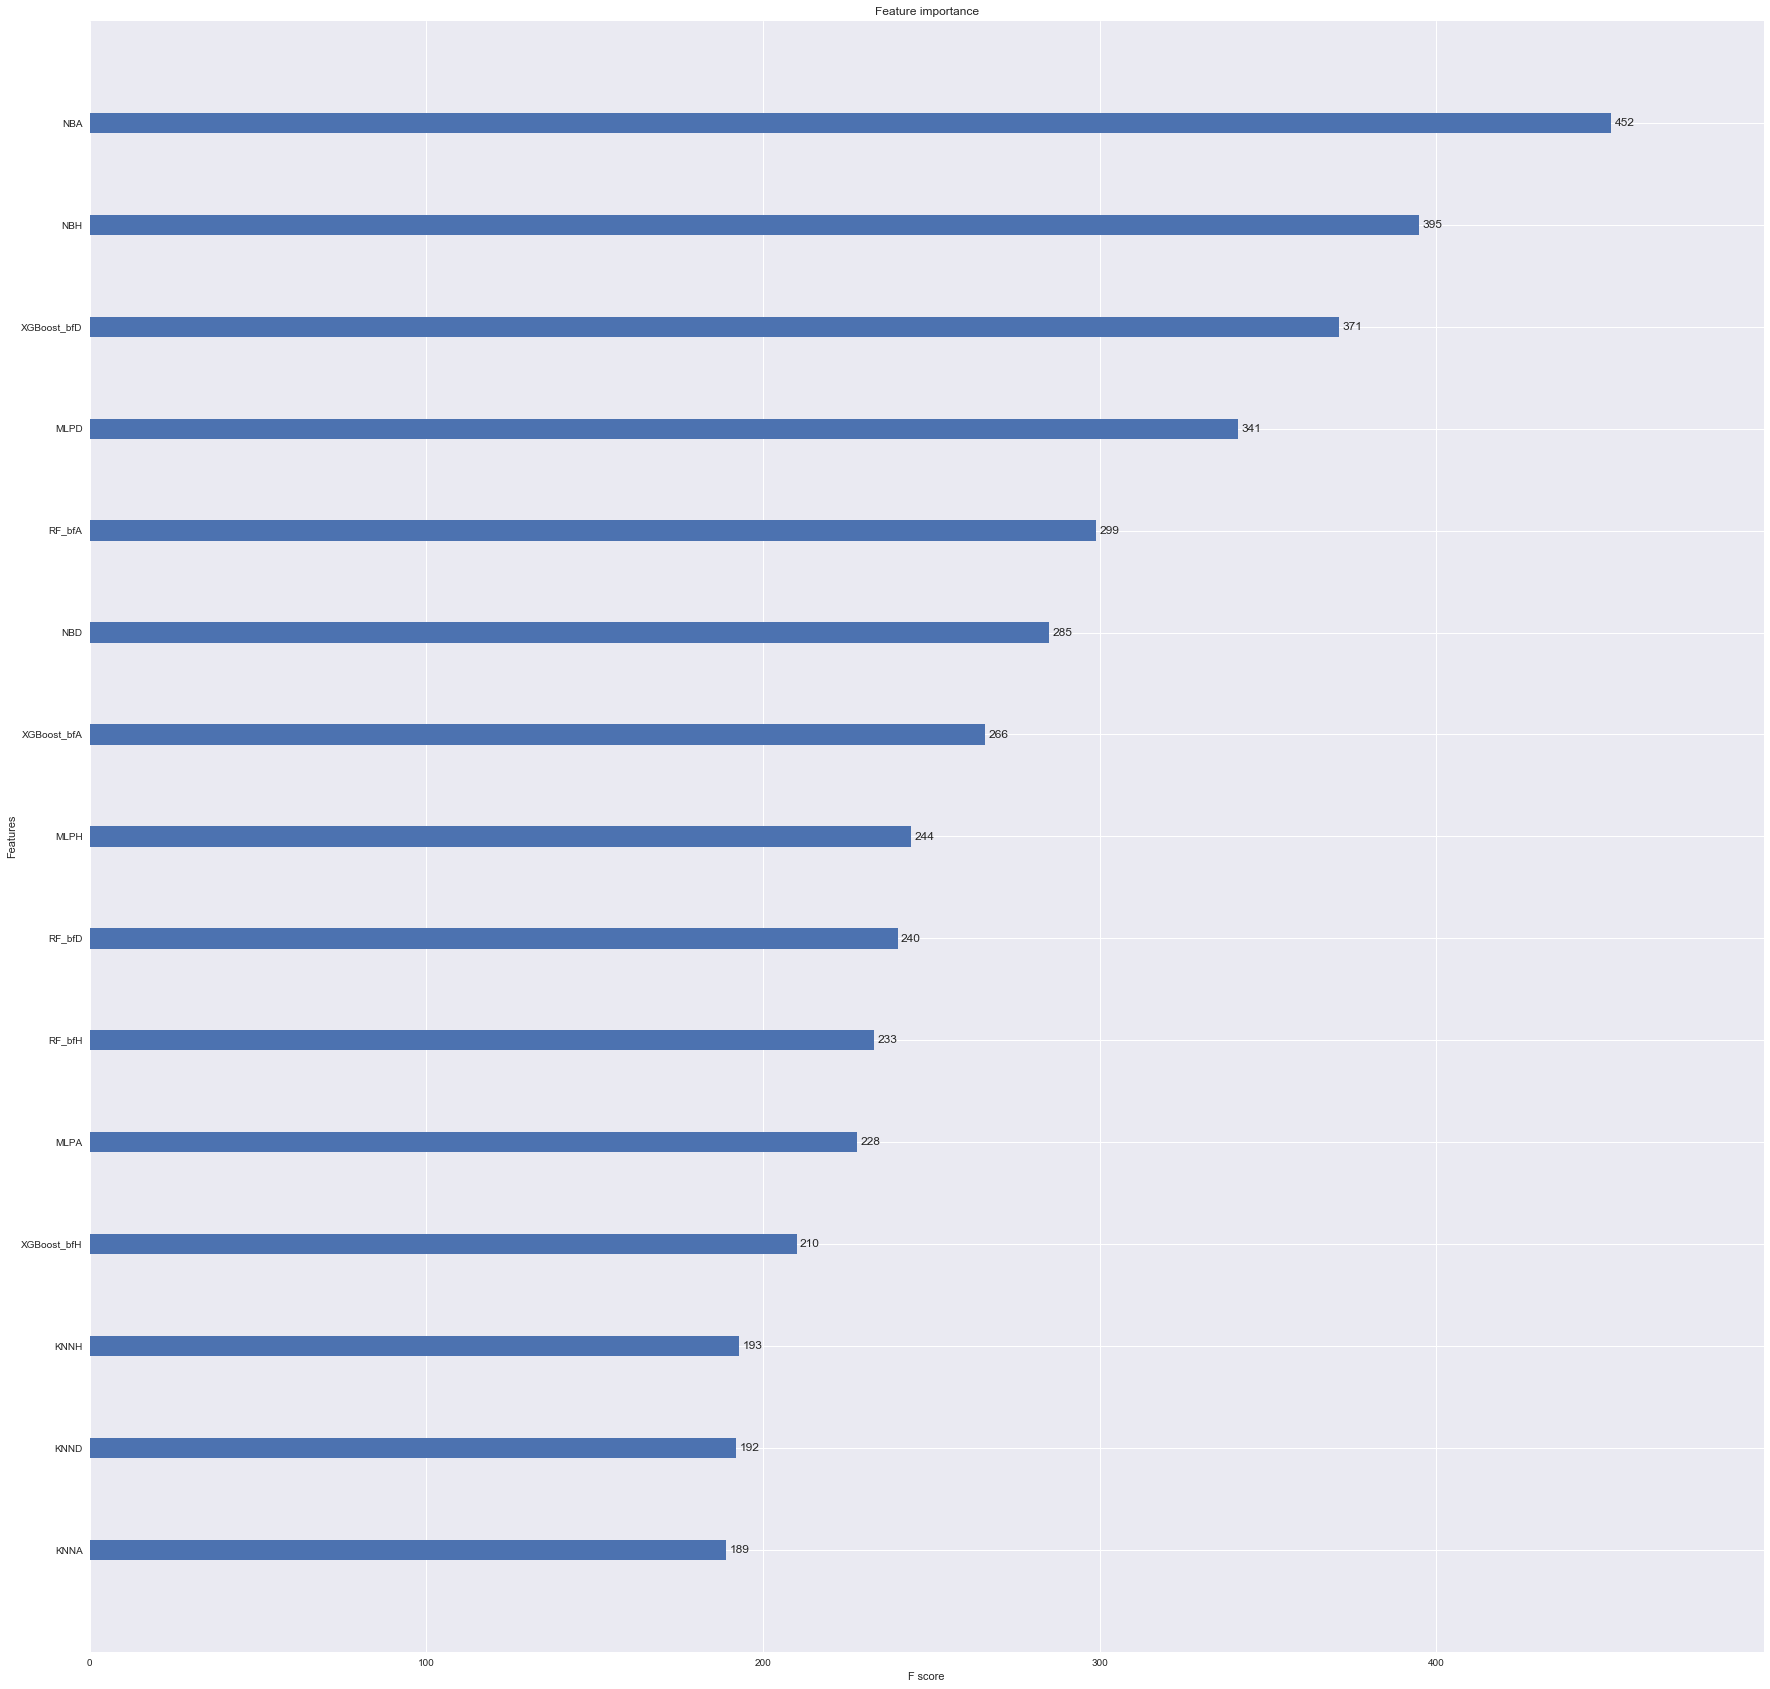

In [30]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# fit model no training data
model = XGBClassifier(
    learning_rate=0.01,
    n_estimators=207,
    max_depth=3,
    min_child_weight=3,
    gamma=0.4,
    subsample=0.65,
    colsample_bytree=0.85,
    objective= 'multi:softprob',
    nthread=4,
    scale_pos_weight=1,
    seed=15)
model.fit(X_layer2_train, y_train_df, eval_metric='logloss')
# plot feature importance
fig, ax = plt.subplots(figsize=(30,30))
plot_importance(model, ax=ax)
pyplot.show()